# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Begin solutions
### Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import astroML.plotting as amplt 
from sklearn.metrics import auc
import warnings


In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16.0, 5.0)

In [3]:
def hist_with_error(data,bins,density=True,**kwargs):
    rv,rb,rp = amplt.hist(data,bins=bins,histtype='step',density=density,**kwargs)
    oldcnt = rv*len(data)*np.diff(rb)
    area = np.sum(rv*len(data)*np.diff(rb)**2) if density else 1
    __ = plt.errorbar((rb[1:]+rb[:-1])/2,rv,yerr=np.sqrt(rv/area),fmt='. ')
    return np.sum(np.diff(rb)*rv),len(rb)

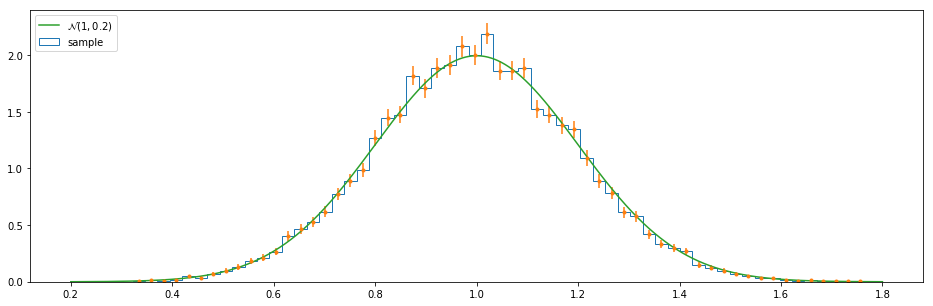

In [4]:
mu = 1;sigma = 0.2; sample_size = 10_000
llim = mu - 4*sigma; ulim = mu + 4*sigma
xvals = np.linspace(llim,ulim,sample_size)

nordist = sp.stats.norm(mu,sigma)
norm_sample = nordist.rvs(sample_size)
norm_pdf = nordist.pdf(xvals)

__ = hist_with_error(norm_sample,bins='freedman',label='sample',density=True) #density == normed python3
__ = plt.plot(xvals,norm_pdf,label=fr'$\mathcal{{N}}({mu},{sigma})$')
__ = plt.legend()

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 

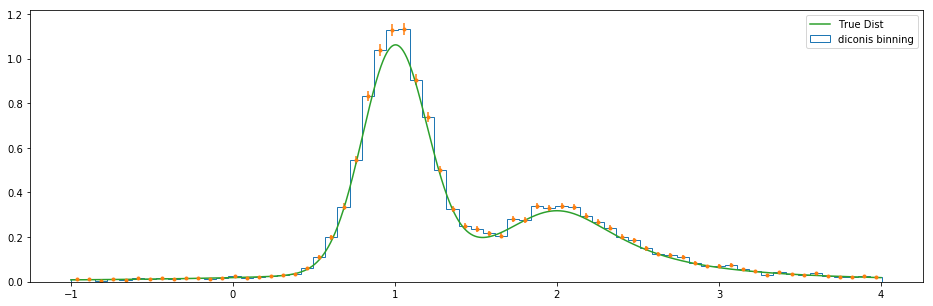

In [5]:
cmu = 2; gma = 0.5; sample_size = 10_000; 
llim = min(mu,cmu) - 4*max(sigma,gma); ulim = max(mu,cmu) + 4*max(sigma,gma);

xvals = np.linspace(llim,ulim,sample_size)
cauchydist = sp.stats.cauchy(cmu,gma)
cauchy_sample = cauchydist.rvs(sample_size)
joined_sample = np.concatenate([norm_sample,cauchy_sample])
joined_pdf = (nordist.pdf(xvals) + cauchydist.pdf(xvals))/2 # Divide by 2 for normalization

arf,binf = hist_with_error(joined_sample,bins='freedman',label='diconis binning',density=True,range=(llim,ulim))
__ = plt.plot(xvals,joined_pdf,label='True Dist')
__ = plt.legend()

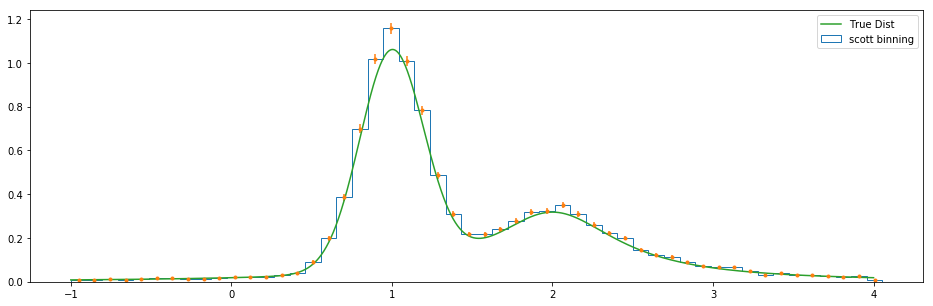

In [6]:
ars,bins = hist_with_error(joined_sample,bins='scott',label='scott binning',density=True,range=(llim,ulim))
__ = plt.plot(xvals,joined_pdf,label='True Dist')
__ = plt.legend()

Diconis binning produced more closely placed bins than scott binning but both still pick up the peaks.Also the cauchy distribution has a longer tails than normal distribution, meaning that a random value further away from mean of cauchy was more likely than equally further value from mean of normal distribution. Which is also apparant from the fact that normal distribution has taller peak at mean than cauchy distribution. Cauchy distributed RVs are less clustered around mean than normal.

## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

In [7]:
def fit_chi_sqr(samples,N=5,label='data',**kwargs):
    xval = np.linspace(0,N+10*np.log(N),samples)
    nors = sp.stats.norm(0,1).rvs(samples)
    sample_averages = [np.sum(np.random.choice(nors,N)**2) for i in range(samples)]
    chisq_pdf = 1/(2**(N/2)*sp.special.gamma(N/2))*xval**(N/2-1)*np.exp(-xval/2)
    amplt.hist(sample_averages,bins='freedman',label=label,density=True,alpha=0.5,**kwargs)
    __ = plt.plot(xval,chisq_pdf,label=r'$\chi^2$ PDF',**kwargs)
    __ = plt.legend()

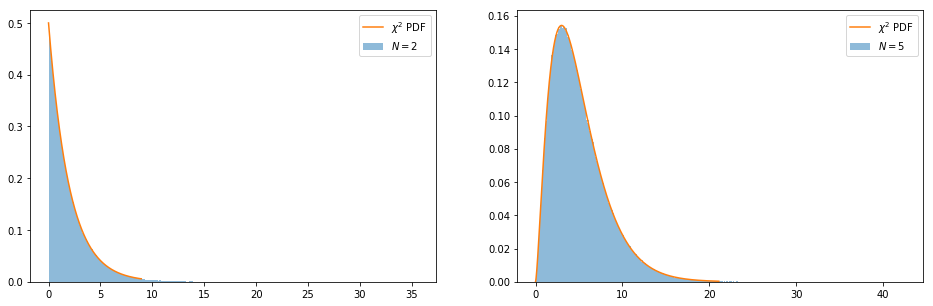

In [8]:
sample = 1_000_000
plt.subplot(121); fit_chi_sqr(sample,N=2,label='$N = 2$')
plt.subplot(122); fit_chi_sqr(sample,N=5,label='$N = 5$')

The squared sum of random variable from a normal distribution has $\chi^2$ distribution. The number of samples taken from normal distribution is the degree freedom of  $\chi^2$ distribution. And for $\chi^2$ distribution the mean is equal to its degree of freedom.